在此类工作区中，你将能够练习在课程中学到的可视化技巧。在此工作区中，你将练习为分类数据创建单变量图形。

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# solution script imports
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

在此工作区中，你要处理的数据集由视频系列游戏 Pokémon 中的角色属性组成。该数据来自[此 GitHub 代码库](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv)中的信息数据库。

In [2]:

pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**任务 1**：该系列游戏出了很多种神奇宝贝。每一代推出了多少种神奇宝贝？请根据 'generation_id' 列绘制出频率_条形图_。

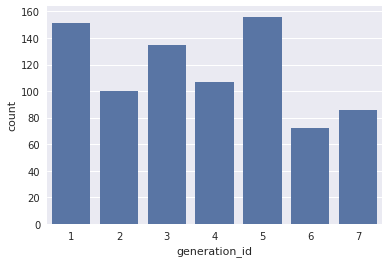

In [3]:
# YOUR CODE HERE
sb.set(style="darkgrid")
sb.countplot(data= pokemon, x="generation_id", color=(0.29803921568627451, 0.44705882352941179, 0.69019607843137254));

创建好图表后，运行以下单元格以检查我们的解决方案的输出。你的可视化图表并非必须和我们的一样，但是应该能够得出相同的结论。

I used seaborn's countplot function to generate this chart. I also added an additional argument so that each bar has the same color.


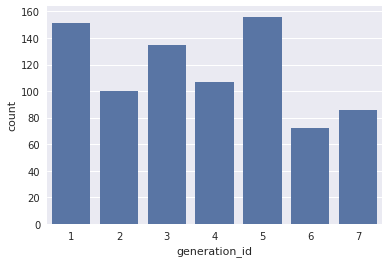

In [4]:
bar_chart_solution_1()

**任务 2**：每种神奇宝贝都具有一到两种在进攻和防御时起到作用的'属性' 。每种属性的频率是多少？以下代码创建了一个新的 DataFrame，该 DataFrame 将所有属性计数放入了一个列中。

In [5]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


你的任务是使用此 DataFrame 创建一个神奇宝贝与每种属性的比例_相对频率_图形，按频率从高到底排序。**提示**：长条之和应该大于 100%，因为很多神奇宝贝具有两种属性。在使用分母计算相对频率时请注意这一点。

In [39]:
n = pokemon.shape[0]
x_value = np.linspace(0, pkmn_types['type'].value_counts().values[0]/n, 10)
x_lable = np.around(x_value, decimals=2)

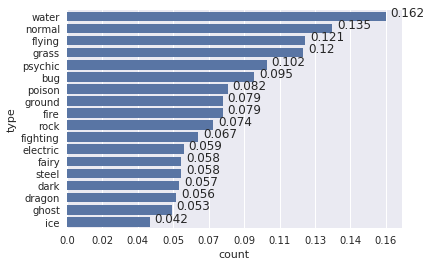

In [91]:
# YOUR CODE HERE
sb.set(style="darkgrid")
sb.countplot(data = pkmn_types, y = "type", color=(0.29803921568627451, 0.44705882352941179, 0.69019607843137254),
            order = pkmn_types['type'].value_counts().index);
plt.xticks(x_value*n, x_lable);
datas = zip(pkmn_types['type'].value_counts().index,pkmn_types['type'].value_counts().values)
for index,data in enumerate(datas):
    plt.text(data[1]+2, index, np.around(data[1]/n, decimals =3))

I created a horizontal bar chart since there are a lot of Pokemon types. The unique() method was used to get the number of different Pokemon species. I also added an xlabel call to make sure it was clear the bar length represents a relative frequency.


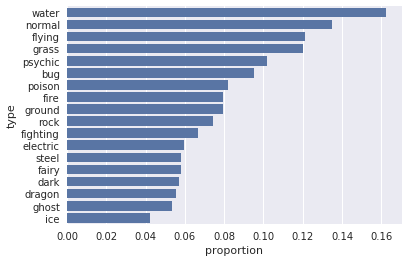

In [15]:
bar_chart_solution_2()

如果你想查看生成解决方案图形的代码，可以在工作区文件夹的 `solutions_univ.py` 脚本中找到这些代码。你可以点击工作区左上角的 Jupyter 图标，转到此文件夹。提醒：该脚本包含这节课的所有工作区练习的解决方案，因此不要提前查看这些答案，以防失去练习机会！